In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install Numpy==1.21.4

!pip install Numba==0.53.0

!pip install pyEddyTracker

!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

!pip install basemap

!pip install cartopy

!pip install shapely --no-binary shapely cartopy

!pip install --no-binary shapely shapely --force

!pip install oceans

!pip install scitools-iris

#!pip install --upgrade numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import matplotlib as mpl
import random
import os
from datetime import datetime
from matplotlib import pyplot as plt
from numpy import arange
from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.eddy_feature import Contours


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker


import iris
#import iris.plot as iplt
import iris.quickplot as qplt

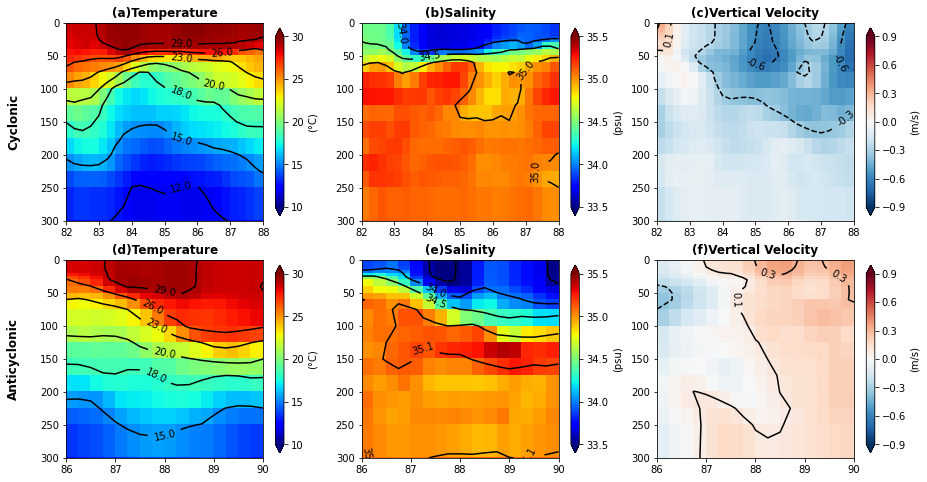

In [46]:
fig = plt.figure(figsize=(15, 8))

################################## Cyclonic ----- Vertical ######################

############################### First Plot -- Temperature -- NEMO ##################################

ax1 = fig.add_subplot(231)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/temp_sept1.nc')

dt = data.loc[{'latitude': slice(0,25),'longitude': slice(82,88)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax1.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(82, 88)
ax1.invert_yaxis()
ax1.set_ylabel('Cyclonic', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 83, 84, 85, 86, 87, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([82, 83, 84, 85, 86, 87, 88])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 23, 26, 29]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=10)

plt.title('(a)Temperature', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- Salinity -- Argo ###################################

ax2 = fig.add_subplot(232)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_sal.nc')

dt = data.loc[{'latitude': slice(0,25),'longitude': slice(82,88)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax2.pcolormesh(ylon, z, temp, vmin=33.5, vmax= 35.5, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(82,88)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 83, 84, 85, 86, 87, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([82, 83, 84, 85, 86, 87, 88])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(33.5, 35.5, num=5), label="(psu)")

levels = [33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(b)Salinity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- Eastward Velocity -- Argo ####################

ax3 = fig.add_subplot(233)

dt = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_vel.nc')



ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["eastward velocity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax3.pcolormesh(ylon, z, temp, vmax= 0.9, vmin=-0.9, cmap = 'RdBu_r')
ax3.set_ylim(0, 300)
ax3.set_xlim(82, 88)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 83, 84, 85, 86, 87, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([82, 83, 84, 85, 86, 87, 88])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.9, 0.9, num=7), label="(m/s)")

levels = [-0.9, -0.6, -0.3, 0.1, 0.3, 0.6, 0.9]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(c)Vertical Velocity', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################## Anticyclonic ----- Vertical ######################

############################### First Plot -- Temperature -- NEMO ##################################

ax1 = fig.add_subplot(234)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept15_temp.nc')

dt = data.loc[{'latitude': slice(0,25),'longitude': slice(86,90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax1.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(86,90)
ax1.invert_yaxis()
ax1.set_ylabel('Anticyclonic', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89, 90]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([86, 87, 88, 89, 90])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 23, 26, 29]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=10)

plt.title('(d)Temperature', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- Salinity -- NEMO ###################################

ax2 = fig.add_subplot(235)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept15_sal.nc')

dt = data.loc[{'latitude': slice(0,25),'longitude': slice(86,90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax2.pcolormesh(ylon, z, temp, vmin=33.5, vmax= 35.5, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(86,90)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89,90]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([86, 87, 88, 89, 90])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(33.5, 35.5, num=5), label="(psu)")

levels = [33.5, 34, 34.5, 35.1]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(e)Salinity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- Eastward Velocity -- Argo ####################

ax3 = fig.add_subplot(236)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept15_vel.nc')

dt = data.loc[{'latitude': slice(0,25),'longitude': slice(86,90)}]



ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["eastward velocity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax3.pcolormesh(ylon, z, temp, vmax=0.9, vmin=-0.9, cmap = 'RdBu_r')
ax3.set_ylim(0, 300)
ax3.set_xlim(86,90)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89, 90]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([86, 87, 88, 89, 90])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.9, 0.9, num=7), label="(m/s)")

levels = [-0.9, -0.6, -0.3, 0.1, 0.3]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(f)Vertical Velocity', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.savefig('drive/MyDrive/2020/subsurface.pdf', dpi=300, bbox_inches = "tight")





In [ ]:
fig = plt.figure(figsize=(15, 8))
 
ax2 = fig.add_subplot(232)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept15_sal.nc')

dt = data.loc[{'latitude': slice(0,25),'longitude': slice(86,90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax2.pcolormesh(ylon, z, temp, vmin=33.5, vmax= 35.5, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(86,90)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89,90]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([86, 87, 88, 89, 90])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(33.5, 35.5, num=5), label="(psu)")

levels = [33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)

print(type(contour))
clabel = plt.clabel(contour, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

print(type(contour))

print(type(z))

for i in z:
  for con in contour.collections:
    if i < 150 and 34.7 < contour < 35.2:
      contour.remove





 

   

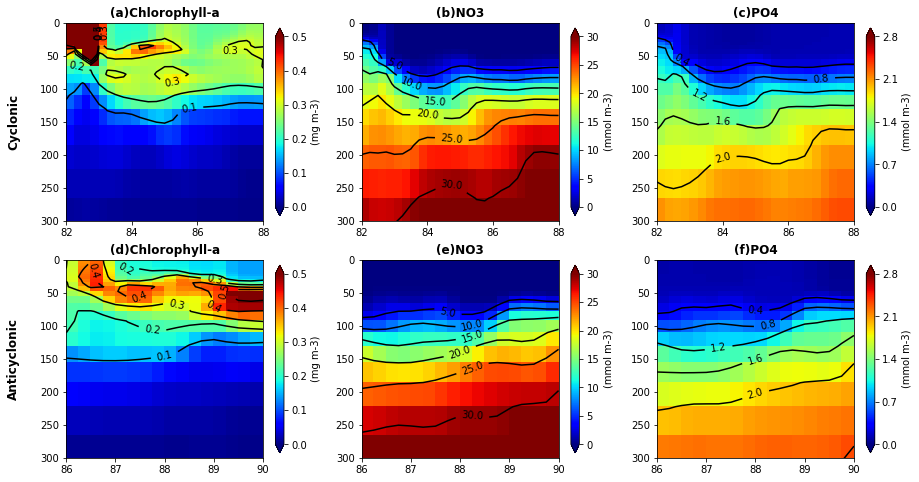

In [102]:
fig = plt.figure(figsize=(15, 8))

################################## Vertical --- Cyclonic ######################

############################### First Plot -- Chl -- Nemo ##################################

ax1 = fig.add_subplot(231)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(82, 88)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["chl"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax1.pcolormesh(ylon, z, temp, vmax = 0.5, vmin= 0, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(82, 88)
ax1.invert_yaxis()
ax1.set_ylabel('Cyclonic', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 84, 86, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([82, 84, 86, 88])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 0.5, num=6), label="(mg m-3)")

levels = [0.1, 0.2, 0.3, 0.4, 0.5]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=10)

plt.title('(a)Chlorophyll-a', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- NO3 -- NEMO ###################################

ax2 = fig.add_subplot(232)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(82, 88)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["no3"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax2.pcolormesh(ylon, z, temp, vmax=30, vmin=0, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(82, 88)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 84, 86, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([82, 84, 86, 88])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 30, num=7), label="(mmol m-3)")

#levels = [32.5, 33, 34, 35]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(b)NO3', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- po4 -- NEMO ####################

ax3 = fig.add_subplot(233)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(82, 88)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["po4"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax3.pcolormesh(ylon, z, temp, vmax=2.8, vmin=0.0, cmap = 'jet')
ax3.set_ylim(0, 300)
ax3.set_xlim(82, 88)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 84, 86, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([82, 84, 86, 88])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 2.8, num=5), label="(mmol m-3)")

#levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(c)PO4', fontsize=12, fontname = 'Times New Roman', weight='bold')


###################################### AC #####################################################

################################  1st plot -- Chl -- NEMO ##########################

ax4 = fig.add_subplot(234)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(86, 90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["chl"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax4.pcolormesh(ylon, z, temp, vmax=0.5, vmin=0, cmap = 'jet')
ax4.set_ylim(0, 300)
ax4.set_xlim(86, 90)
ax4.invert_yaxis()
ax4.set_ylabel('Anticyclonic', labelpad=20, fontsize=12, weight='bold', color='k')
#ax4.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89, 90]
y = [0, 50, 100, 150, 200, 250, 300]

ax4.set_xticks([86, 87, 88, 89, 90])
ax4.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax4.set_yticklabels(y)
ax4.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 0.5, num=6), label="(mg m-3)")

levels = [0.1, 0.2, 0.3, 0.4, 0.5]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(d)Chlorophyll-a', fontsize=12, fontname = 'Times New Roman', weight='bold')


###############################  2nd plot -- no3 -- nemo #########################################

ax5 = fig.add_subplot(235)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(86, 90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["no3"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax5.pcolormesh(ylon, z, temp, vmax=30, vmin=0, cmap = 'jet')
ax5.set_ylim(0, 300)
ax5.set_xlim(86, 90)
ax5.invert_yaxis()
#ax5.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax5.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89, 90]
y = [0, 50, 100, 150, 200, 250, 300]

ax5.set_xticks([86, 87, 88, 89, 90])
ax5.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax5.set_yticklabels(y)
ax5.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 30, num=7), label="(mmol m-3)")


#levels = [32.5, 33, 33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k')

plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(e)NO3', fontsize=12, fontname = 'Times New Roman', weight='bold')


#################################  3rd Plot -- PO4 -- NEMO #######################

ax6 = fig.add_subplot(236)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(86, 90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["po4"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax6.pcolormesh(ylon, z, temp, vmax=2.8, vmin=0.0,  cmap = 'jet')
ax6.set_ylim(0, 300)
ax6.set_xlim(86, 90)
ax6.invert_yaxis()
#ax6.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax6.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89, 90]
y = [0, 50, 100, 150, 200, 250, 300]

ax6.set_xticks([86, 87, 88, 89, 90])
ax6.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax6.set_yticklabels(y)
ax6.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 2.8, num=5), label="(mmol m-3)")

#levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(f)PO4', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.savefig('drive/MyDrive/2020/biogeo1.png', dpi=300, bbox_inches = "tight")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:193: UserWarning: No contour levels were found within the data range.


Text(0.5, 1.0, '(f)O2')

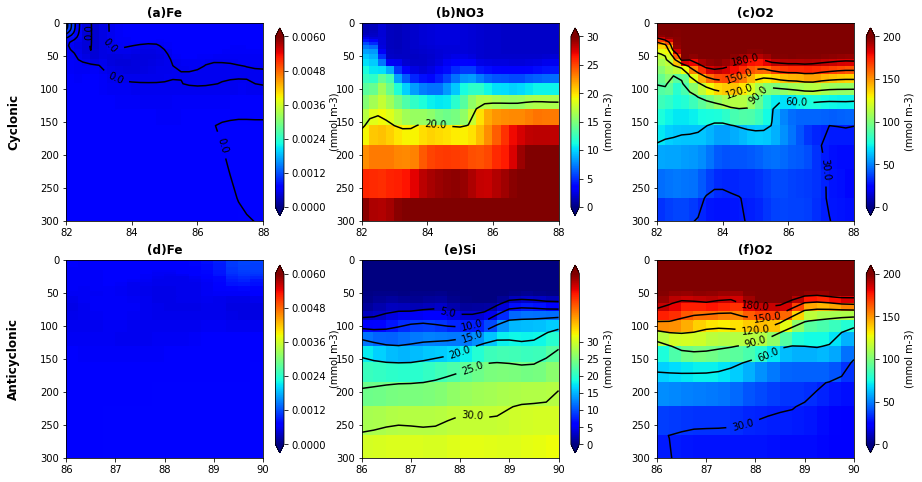

In [106]:
fig = plt.figure(figsize=(15, 8))

################################## Vertical --- Cyclonic ######################

############################### First Plot -- Fe -- Nemo ##################################

ax1 = fig.add_subplot(231)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(82, 88)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["fe"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax1.pcolormesh(ylon, z, temp, vmax = 0.006, vmin= 0, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(82, 88)
ax1.invert_yaxis()
ax1.set_ylabel('Cyclonic', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 84, 86, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([82, 84, 86, 88])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 0.006, num=6), label="(mmol m-3)")

#levels = [0.1, 0.2, 0.3, 0.4, 0.5]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=10)

plt.title('(a)Fe', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- NO3 -- NEMO ###################################

ax2 = fig.add_subplot(232)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(82, 88)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["si"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax2.pcolormesh(ylon, z, temp, vmax=30, vmin=0, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(82, 88)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 84, 86, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([82, 84, 86, 88])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 30, num=7), label="(mmol m-3)")

#levels = [32.5, 33, 34, 35]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(b)NO3', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- po4 -- NEMO ####################

ax3 = fig.add_subplot(233)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(82, 88)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["o2"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(6)


cs = ax3.pcolormesh(ylon, z, temp, vmax=200, vmin=0.0, cmap = 'jet')
ax3.set_ylim(0, 300)
ax3.set_xlim(82, 88)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [82, 84, 86, 88]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([82, 84, 86, 88])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 200, num=5), label="(mmol m-3)")

#levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(c)O2', fontsize=12, fontname = 'Times New Roman', weight='bold')


###################################### AC #####################################################

################################  1st plot -- Chl -- NEMO ##########################

ax4 = fig.add_subplot(234)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(86, 90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["fe"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax4.pcolormesh(ylon, z, temp, vmax=0.006, vmin=0, cmap = 'jet')
ax4.set_ylim(0, 300)
ax4.set_xlim(86, 90)
ax4.invert_yaxis()
ax4.set_ylabel('Anticyclonic', labelpad=20, fontsize=12, weight='bold', color='k')
#ax4.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89, 90]
y = [0, 50, 100, 150, 200, 250, 300]

ax4.set_xticks([86, 87, 88, 89, 90])
ax4.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax4.set_yticklabels(y)
ax4.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 0.006, num=6), label="(mmol m-3)")

levels = [0.1, 0.2, 0.3, 0.4, 0.5]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(d)Fe', fontsize=12, fontname = 'Times New Roman', weight='bold')


###############################  2nd plot -- no3 -- nemo #########################################

ax5 = fig.add_subplot(235)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(86, 90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["no3"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax5.pcolormesh(ylon, z, temp, vmax=50, vmin=0, cmap = 'jet')
ax5.set_ylim(0, 300)
ax5.set_xlim(86, 90)
ax5.invert_yaxis()
#ax5.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax5.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89, 90]
y = [0, 50, 100, 150, 200, 250, 300]

ax5.set_xticks([86, 87, 88, 89, 90])
ax5.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax5.set_yticklabels(y)
ax5.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 30, num=7), label="(mmol m-3)")


#levels = [32.5, 33, 33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k')

plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(e)Si', fontsize=12, fontname = 'Times New Roman', weight='bold')


#################################  3rd Plot -- PO4 -- NEMO #######################

ax6 = fig.add_subplot(236)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/singleday/sept1_biogeo.nc')

dt = data.loc[{'latitude': slice(0, 25),'longitude': slice(86, 90)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["o2"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(7.5)


cs = ax6.pcolormesh(ylon, z, temp, vmax=200, vmin=0.0,  cmap = 'jet')
ax6.set_ylim(0, 300)
ax6.set_xlim(86, 90)
ax6.invert_yaxis()
#ax6.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax6.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [86, 87, 88, 89, 90]
y = [0, 50, 100, 150, 200, 250, 300]

ax6.set_xticks([86, 87, 88, 89, 90])
ax6.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax6.set_yticklabels(y)
ax6.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(0, 200, num=5), label="(mmol m-3)")

#levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(f)O2', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.savefig('drive/MyDrive/2020/biogeo1.png', dpi=300, bbox_inches = "tight")



We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc


/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloadin

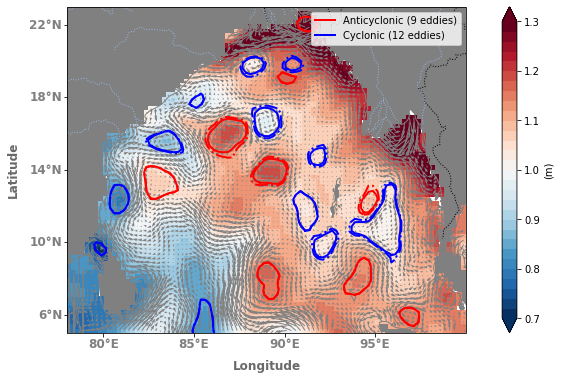

In [ ]:
plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 23], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


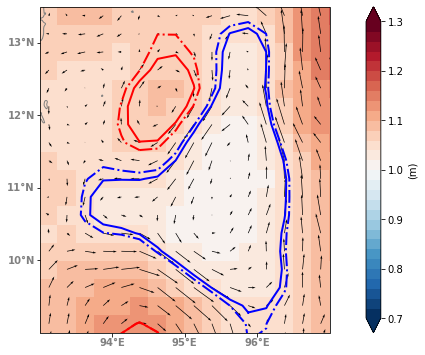

In [ ]:
###################################### Cyclonic ##################################


plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([93, 97, 9, 13.5], ccrs.PlateCarree()) 

ax.set_xticks([94, 95, 96])
ax.set_yticks([10, 11, 12, 13])

gl = ax.gridlines()
gl.xlocator = mticker.FixedLocator(np.arange(93,97,1))
gl.ylocator = mticker.FixedLocator(np.arange(9,14,1))


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')



ax.set_yticklabels([])
ax.set_xticklabels([])


gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False


gl.xlabel_style = {'size': 10, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 10, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2021, 8, 17)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=5, color="k")

#ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/sss_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/sst_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/mld_aug17.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


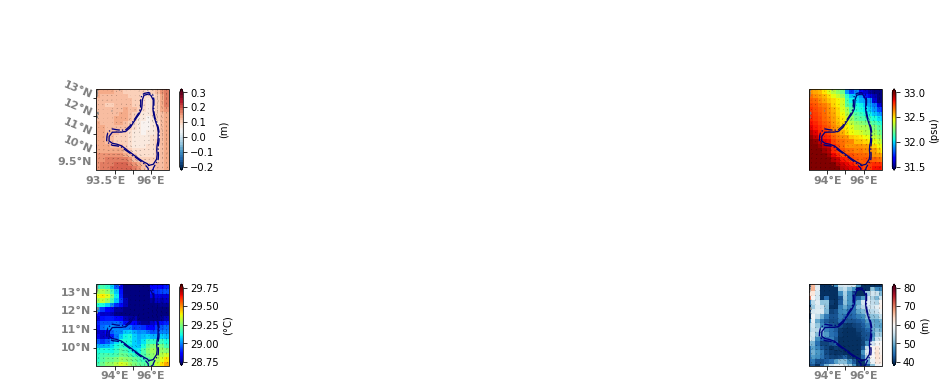

In [ ]:
fig = plt.figure(figsize=(20, 20))


############################### Cyclonic ######################################

############################### First Plot -- SLA ##################################

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax.set_extent([93, 97, 9, 13.5], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
#ax.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([94, 95, 96])
ax.set_yticks([10, 11, 12, 13])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(93, 97, 0.5))
gl.ylocator = mticker.FixedLocator(np.arange(9, 14, 0.5))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

m = g.display(ax, "sla", vmin=-0.2, vmax=0.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 8, 17)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
c.display(ax, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=8, color="k")

#ax.legend(loc='upper right', fontsize = 6)

ax.annotate('(a)SLA', xy=(88.1, 17.6), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m, extend='both', ticks=np.linspace(-0.2, 0.3, num=6), label='(m)')


############################### Second plot -- SSS #####################################

ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax2.set_extent([93, 97, 9, 13.5], ccrs.PlateCarree()) 


ax2.add_feature(cfeature.LAND, color = 'gray')
ax2.add_feature(cfeature.COASTLINE, color = 'gray')
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax2.set_xticks([94, 95, 96])
#ax.set_yticks([13.5, 14, 14.5])

#ax4.set_yticklabels([])
ax2.set_xticklabels([])

gl2 = ax2.gridlines()
gl2.bottom_labels = True
gl2.left_labels = False
gl2.xlines = False
gl2.ylines = False

gl2.xlocator = mticker.FixedLocator(np.arange(93, 97, 1))
gl2.ylocator = mticker.FixedLocator(np.arange(9, 14, 1))

gl2.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl2.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g2 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g22 = RegularGridDataset('drive/MyDrive/2020/Vertical/sss_aug17.nc', "lon", "lat",)

m2 = g22.display(ax2, "sos", vmin=31.5, vmax=33, cmap = 'jet')

date = datetime(2020, 8, 17)
a, c = g2.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax2, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
c.display(ax2, color="navy", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)

g2.add_uv("adt")
u, v = g2.grid("u").T, g2.grid("v").T
ax2.quiver(g2.x_c, g2.y_c, u, v, scale=8, color="k")

#ax1.legend(loc='upper right', fontsize = 6)

ax2.annotate('(b)SSS', xy=(88.1, 17.6), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Spring', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m2, extend='both', ticks=np.linspace(31.5, 33, num=4), label='(psu)')


############################# Third Plot -- SST ############################

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax3.set_extent([93, 97, 9, 13.5], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([94, 95, 96])
ax3.set_yticks([10, 11, 12, 13])

ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = True
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(93, 97, 1))
gl3.ylocator = mticker.FixedLocator(np.arange(9, 14, 1))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g33 = RegularGridDataset('drive/MyDrive/2020/Vertical/sst_aug17.nc', "lon", "lat",)

m3 = g33.display(ax3, "sst", vmin=28.75, vmax=29.75, cmap = 'jet')

date = datetime(2020, 8, 17)
a, c = g3.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax3, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
c.display(ax3, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g3.add_uv("adt")
u, v = g3.grid("u").T, g3.grid("v").T
ax3.quiver(g3.x_c, g3.y_c, u, v, scale=8, color="k")

#ax3.legend(loc='upper right', fontsize = 6)

ax3.annotate('(c)SST', xy=(88.1, 17.6), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m3, extend='both', ticks=np.linspace(28.75, 29.75, num=5), label='(°C)')

######################## Fourth Plot -- MLD #######################

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
ax4.set_extent([93, 97, 9, 13.5], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([94, 95, 96])
#ax.set_yticks([13.5, 14, 14.5])

#ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = False
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(93, 97, 1))
gl4.ylocator = mticker.FixedLocator(np.arange(9, 14, 1))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g44 = RegularGridDataset('drive/MyDrive/2020/Vertical/mld_aug17.nc', "lon", "lat",)

m4 = g44.display(ax4, "mlotst", vmin=40, vmax=80, cmap = 'RdBu_r')

date = datetime(2020, 8, 17)
a, c = g4.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax4, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
c.display(ax4, color="navy", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)

g4.add_uv("adt")
u, v = g4.grid("u").T, g4.grid("v").T
ax4.quiver(g4.x_c, g4.y_c, u, v, scale=8, color="k")

#ax4.legend(loc='upper right', fontsize = 6)

ax4.annotate('(d)MLD', xy=(88.1, 17.6), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

plt.colorbar(m4, extend='both', ticks=np.linspace(40, 80, num=5), label='(m)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.2, wspace=None, hspace=None)


#plt.colorbar(m4, cax=ax4.figure.add_axes([0.66, 0.15, 0.016, 0.70]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

#plt.savefig('drive/MyDrive/2020/cc_surface.png', dpi=300, bbox_inches = "tight")



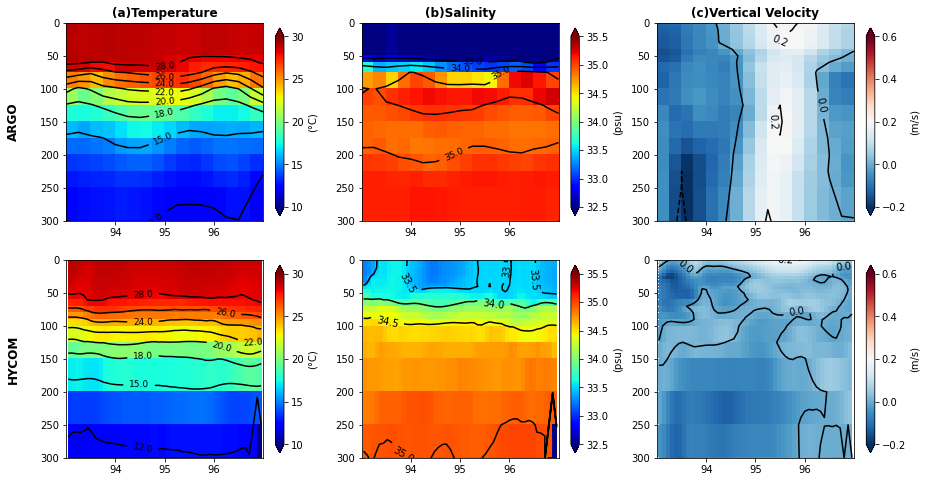

In [ ]:
fig = plt.figure(figsize=(15, 8))

################################## Cyclonic ----- Vertical ######################

############################### First Plot -- Temperature -- Argo ##################################

ax1 = fig.add_subplot(231)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_temp.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(11)


cs = ax1.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(93, 97)
ax1.invert_yaxis()
ax1.set_ylabel('ARGO', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([94, 95, 96])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=9)

plt.title('(a)Temperature', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- Salinity -- Argo ###################################

ax2 = fig.add_subplot(232)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_argo.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(11)


cs = ax2.pcolormesh(ylon, z, temp, vmin=32.5, vmax= 35.5, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(93, 97)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([94, 95, 96])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")

levels = [32, 33, 34, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, inline=True, colors='k', fmt=r'%.1f', fontsize=9)

plt.title('(b)Salinity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- Eastward Velocity -- Argo ####################

ax3 = fig.add_subplot(233)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_vel_argo.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["uo"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(11)


cs = ax3.pcolormesh(ylon, z, temp, vmax=0.6, vmin=-0.2, cmap = 'RdBu_r')
ax3.set_ylim(0, 300)
ax3.set_xlim(93, 97)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([94, 95, 96])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(c)Vertical Velocity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################  1st plot -- Temperature -- Hycom ##########################

ax4 = fig.add_subplot(234)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_hycom.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(11)


cs = ax4.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax4.set_ylim(0, 300)
ax4.set_xlim(93, 97)
ax4.invert_yaxis()
ax4.set_ylabel('HYCOM', labelpad=20, fontsize=12, weight='bold', color='k')
#ax4.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax4.set_xticks([94, 95, 96])
ax4.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax4.set_yticklabels(y)
ax4.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=9)


###############################  2nd plot -- Salinity -- Hycom #########################################

ax5 = fig.add_subplot(235)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_sal_hycom.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(11)


cs = ax5.pcolormesh(ylon, z, temp, vmin=32.5, vmax= 35.5, cmap = 'jet')
ax5.set_ylim(0, 300)
ax5.set_xlim(93, 97)
ax5.invert_yaxis()
#ax5.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax5.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax5.set_xticks([94, 95, 96])
ax5.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax5.set_yticklabels(y)
ax5.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")


levels = [32, 33, 33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)

plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


#################################  3rd Plot -- Eastward Velocity -- Hycom #######################

ax6 = fig.add_subplot(236)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_vel_hycom.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["uo"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(11)


cs = ax6.pcolormesh(ylon, z, temp, vmax = 0.6, vmin = -0.2, cmap = 'RdBu_r')
ax6.set_ylim(0, 300)
ax6.set_xlim(93, 97)
ax6.invert_yaxis()
#ax6.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax6.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax6.set_xticks([94, 95, 96])
ax6.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax6.set_yticklabels(y)
ax6.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.savefig('drive/MyDrive/2020/vertical_cc_lat11.png', dpi=300, bbox_inches = "tight")



<a list of 13 text.Text objects>

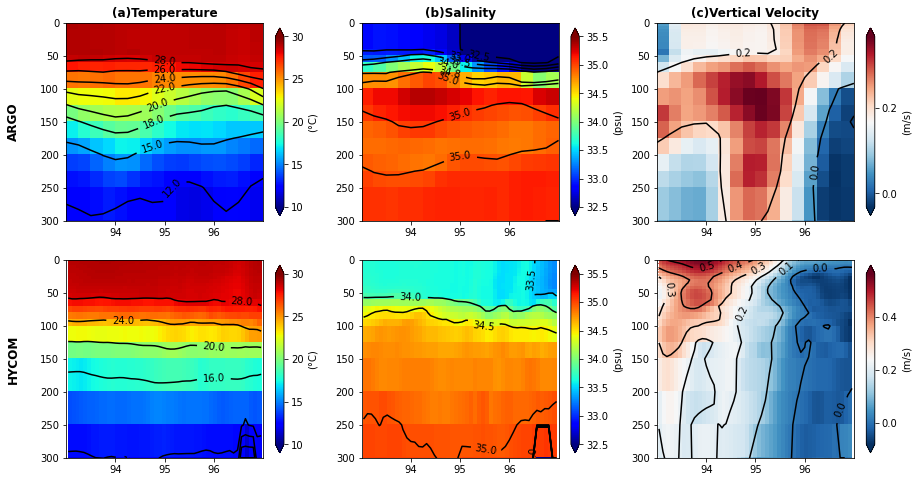

In [ ]:
fig = plt.figure(figsize=(15, 8))

################################## Cyclonic ----- Vertical ######################

############################### First Plot -- Temperature -- Argo ##################################

ax1 = fig.add_subplot(231)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_temp.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(10)


cs = ax1.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(93, 97)
ax1.invert_yaxis()
ax1.set_ylabel('ARGO', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([94, 95, 96])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=10)

plt.title('(a)Temperature', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- Salinity -- Argo ###################################

ax2 = fig.add_subplot(232)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_argo.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(10)


cs = ax2.pcolormesh(ylon, z, temp, vmin=32.5, vmax= 35.5, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(93, 97)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([94, 95, 96])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")

levels = [32.5, 33, 33.5, 34, 34.8, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(b)Salinity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- Eastward Velocity -- Argo ####################

ax3 = fig.add_subplot(233)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_vel_argo.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["uo"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(10)


cs = ax3.pcolormesh(ylon, z, temp, cmap = 'RdBu_r')
ax3.set_ylim(0, 300)
ax3.set_xlim(93, 97)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([94, 95, 96])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(c)Vertical Velocity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################  1st plot -- Temperature -- Hycom ##########################

ax4 = fig.add_subplot(234)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_hycom.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(10)


cs = ax4.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax4.set_ylim(0, 300)
ax4.set_xlim(93, 97)
ax4.invert_yaxis()
ax4.set_ylabel('HYCOM', labelpad=20, fontsize=12, weight='bold', color='k')
#ax4.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax4.set_xticks([94, 95, 96])
ax4.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax4.set_yticklabels(y)
ax4.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

#levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


###############################  2nd plot -- Salinity -- Hycom #########################################

ax5 = fig.add_subplot(235)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_sal_hycom.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(10)


cs = ax5.pcolormesh(ylon, z, temp, vmin=32.5, vmax= 35.5, cmap = 'jet')
ax5.set_ylim(0, 300)
ax5.set_xlim(93, 97)
ax5.invert_yaxis()
#ax5.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax5.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax5.set_xticks([94, 95, 96])
ax5.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax5.set_yticklabels(y)
ax5.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")


levels = [32.5, 33, 33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)

plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


#################################  3rd Plot -- Eastward Velocity -- Hycom #######################

ax6 = fig.add_subplot(236)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_vel_hycom.nc')

dt = data.loc[{'latitude': slice(9, 14),'longitude': slice(93, 97)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["uo"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(10)


cs = ax6.pcolormesh(ylon, z, temp, cmap = 'RdBu_r')
ax6.set_ylim(0, 300)
ax6.set_xlim(93, 97)
ax6.invert_yaxis()
#ax6.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax6.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [94, 95, 96]
y = [0, 50, 100, 150, 200, 250, 300]

ax6.set_xticks([94, 95, 96])
ax6.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax6.set_yticklabels(y)
ax6.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

#levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

#plt.savefig('drive/MyDrive/2020/vertical_cc_lat16.png', dpi=300, bbox_inches = "tight")



We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


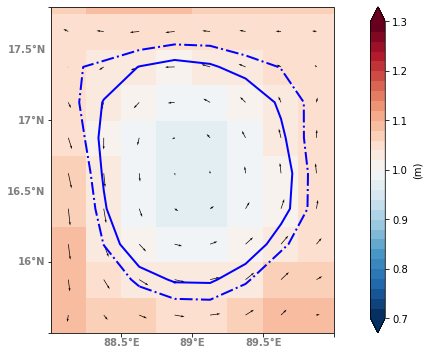

In [ ]:
###################################### Cyclonic ##################################


plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88, 90, 15.5, 17.8], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([88.5, 89, 89.5, 90])
ax.set_yticks([15.5, 16, 17, 17.8])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl.ylocator = mticker.FixedLocator(np.arange(15.5,18,0.5))

gl.xlabel_style = {'size': 10, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 10, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2021, 8, 17)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=8, color="k")

#ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/sss_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/sst_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/mld_aug17.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


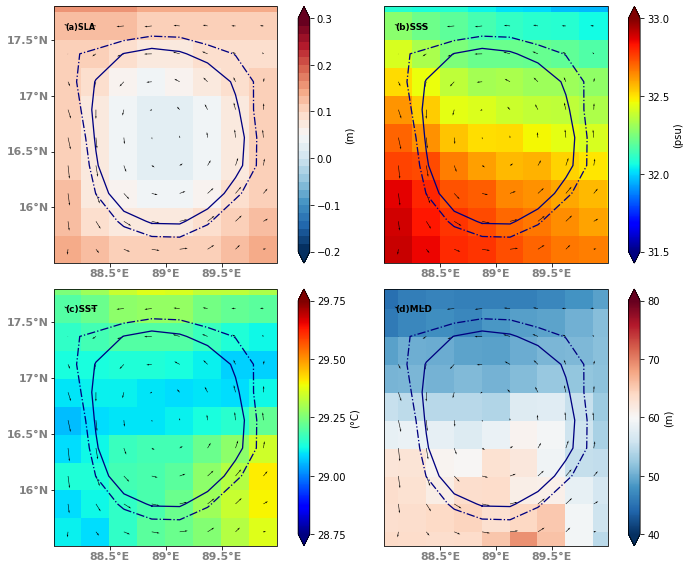

In [ ]:
fig = plt.figure(figsize=(15, 8))


############################### Cyclonic ######################################

############################### First Plot -- SLA ##################################

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax.set_extent([88, 90, 15.5, 17.8], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
#ax.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([88.5, 89, 89.5])
ax.set_yticks([16, 16.5, 17, 17.5])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(88,90,0.5))
gl.ylocator = mticker.FixedLocator(np.arange(15.5,18,0.5))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

m = g.display(ax, "sla", vmin=-0.2, vmax=0.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 8, 17)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
c.display(ax, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=8, color="k")

#ax.legend(loc='upper right', fontsize = 6)

ax.annotate('(a)SLA', xy=(88.1, 17.6), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m, extend='both', ticks=np.linspace(-0.2, 0.3, num=6), label='(m)')


############################### Second plot -- SSS #####################################

ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax2.set_extent([88, 90, 15.5, 17.8], ccrs.PlateCarree()) 


ax2.add_feature(cfeature.LAND, color = 'gray')
ax2.add_feature(cfeature.COASTLINE, color = 'gray')
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax2.set_xticks([88.5, 89, 89.5])
#ax.set_yticks([13.5, 14, 14.5])

#ax4.set_yticklabels([])
ax2.set_xticklabels([])

gl2 = ax2.gridlines()
gl2.bottom_labels = True
gl2.left_labels = False
gl2.xlines = False
gl2.ylines = False

gl2.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl2.ylocator = mticker.FixedLocator(np.arange(13,15,0.5))

gl2.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl2.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g2 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g22 = RegularGridDataset('drive/MyDrive/2020/Vertical/sss_aug17.nc', "lon", "lat",)

m2 = g22.display(ax2, "sos", vmin=31.5, vmax=33, cmap = 'jet')

date = datetime(2020, 8, 17)
a, c = g2.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax2, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
c.display(ax2, color="navy", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)

g2.add_uv("adt")
u, v = g2.grid("u").T, g2.grid("v").T
ax2.quiver(g2.x_c, g2.y_c, u, v, scale=8, color="k")

#ax1.legend(loc='upper right', fontsize = 6)

ax2.annotate('(b)SSS', xy=(88.1, 17.6), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Spring', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m2, extend='both', ticks=np.linspace(31.5, 33, num=4), label='(psu)')


############################# Third Plot -- SST ############################

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax3.set_extent([88, 90, 15.5, 17.8], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([88.5, 89, 89.5])
ax3.set_yticks([16,16.5,17,17.5])

ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = True
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl3.ylocator = mticker.FixedLocator(np.arange(15,18,0.5))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g33 = RegularGridDataset('drive/MyDrive/2020/Vertical/sst_aug17.nc', "lon", "lat",)

m3 = g33.display(ax3, "sst", vmin=28.75, vmax=29.75, cmap = 'jet')

date = datetime(2020, 8, 17)
a, c = g3.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax3, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
c.display(ax3, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g3.add_uv("adt")
u, v = g3.grid("u").T, g3.grid("v").T
ax3.quiver(g3.x_c, g3.y_c, u, v, scale=8, color="k")

#ax3.legend(loc='upper right', fontsize = 6)

ax3.annotate('(c)SST', xy=(88.1, 17.6), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m3, extend='both', ticks=np.linspace(28.75, 29.75, num=5), label='(°C)')

######################## Fourth Plot -- MLD #######################

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
ax4.set_extent([88, 90, 15.5, 17.8], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([88.5, 89, 89.5])
#ax.set_yticks([13.5, 14, 14.5])

#ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = False
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl4.ylocator = mticker.FixedLocator(np.arange(15,18,0.5))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g44 = RegularGridDataset('drive/MyDrive/2020/Vertical/mld_aug17.nc', "lon", "lat",)

m4 = g44.display(ax4, "mlotst", vmin=40, vmax=80, cmap = 'RdBu_r')

date = datetime(2020, 8, 17)
a, c = g4.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax4, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
c.display(ax4, color="navy", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)

g4.add_uv("adt")
u, v = g4.grid("u").T, g4.grid("v").T
ax4.quiver(g4.x_c, g4.y_c, u, v, scale=8, color="k")

#ax4.legend(loc='upper right', fontsize = 6)

ax4.annotate('(d)MLD', xy=(88.1, 17.6), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

plt.colorbar(m4, extend='both', ticks=np.linspace(40, 80, num=5), label='(m)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=0.7, top=None, wspace=None, hspace=None)


#plt.colorbar(m4, cax=ax4.figure.add_axes([0.66, 0.15, 0.016, 0.70]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

plt.savefig('drive/MyDrive/2020/cc_surface.png', dpi=300, bbox_inches = "tight")





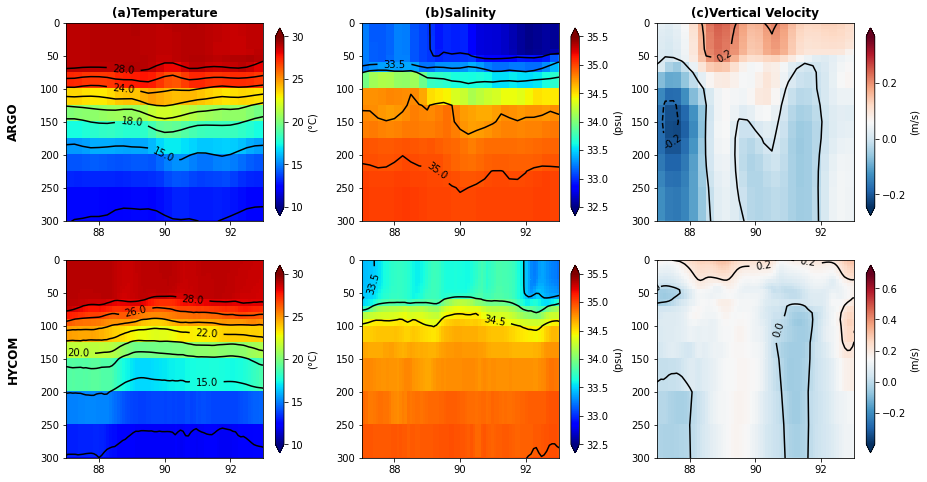

In [ ]:
fig = plt.figure(figsize=(15, 8))

################################## Cyclonic ----- Vertical ######################

############################### First Plot -- Temperature -- Argo ##################################

ax1 = fig.add_subplot(231)

dt = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_temp.nc')

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(16)


cs = ax1.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(87, 93)
ax1.invert_yaxis()
ax1.set_ylabel('ARGO', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([88, 90, 92])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=10)

plt.title('(a)Temperature', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- Salinity -- Argo ###################################

ax2 = fig.add_subplot(232)

dt = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_argo.nc')

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(16)


cs = ax2.pcolormesh(ylon, z, temp, vmin=32.5, vmax= 35.5, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(87, 93)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([88, 90, 92])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")

levels = [32.5, 33, 33.5, 34, 34.8, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(b)Salinity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- Eastward Velocity -- Argo ####################

ax3 = fig.add_subplot(233)

dt = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_vel_argo.nc')

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["uo"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(16)


cs = ax3.pcolormesh(ylon, z, temp, cmap = 'RdBu_r')
ax3.set_ylim(0, 300)
ax3.set_xlim(87, 93)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([88, 90, 92])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(c)Vertical Velocity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################  1st plot -- Temperature -- Hycom ##########################

ax4 = fig.add_subplot(234)

dt = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_hycom.nc')

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(16)


cs = ax4.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax4.set_ylim(0, 300)
ax4.set_xlim(87, 93)
ax4.invert_yaxis()
ax4.set_ylabel('HYCOM', labelpad=20, fontsize=12, weight='bold', color='k')
#ax4.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax4.set_xticks([88, 90, 92])
ax4.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax4.set_yticklabels(y)
ax4.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


###############################  2nd plot -- Salinity -- Hycom #########################################

ax5 = fig.add_subplot(235)

dt = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_sal_hycom.nc')

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(16)


cs = ax5.pcolormesh(ylon, z, temp, vmin=32.5, vmax= 35.5, cmap = 'jet')
ax5.set_ylim(0, 300)
ax5.set_xlim(87, 93)
ax5.invert_yaxis()
#ax5.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax5.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax5.set_xticks([88, 90, 92])
ax5.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax5.set_yticklabels(y)
ax5.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")


levels = [32.5, 33, 33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)

plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


#################################  3rd Plot -- Eastward Velocity -- Hycom #######################

ax6 = fig.add_subplot(236)

dt = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_vel_hycom.nc')

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["uo"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(16)


cs = ax6.pcolormesh(ylon, z, temp, cmap = 'RdBu_r')
ax6.set_ylim(0, 300)
ax6.set_xlim(87, 93)
ax6.invert_yaxis()
#ax6.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax6.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax6.set_xticks([88, 90, 92])
ax6.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax6.set_yticklabels(y)
ax6.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

#plt.savefig('drive/MyDrive/2020/vertical_cc_lat16.png', dpi=300, bbox_inches = "tight")



We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


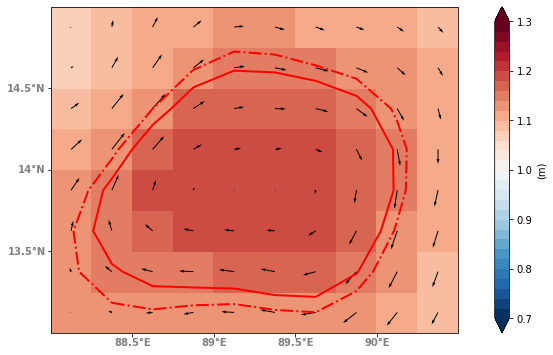

In [ ]:
plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88, 90.5, 13, 15], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([88.5, 89, 89.5, 90])
ax.set_yticks([13.5, 14, 14.5])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl.ylocator = mticker.FixedLocator(np.arange(13,15,0.5))

gl.xlabel_style = {'size': 10, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 10, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2021, 8, 17)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=8, color="k")

#ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/sss_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/sst_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_aug17.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/Vertical/mld_aug17.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


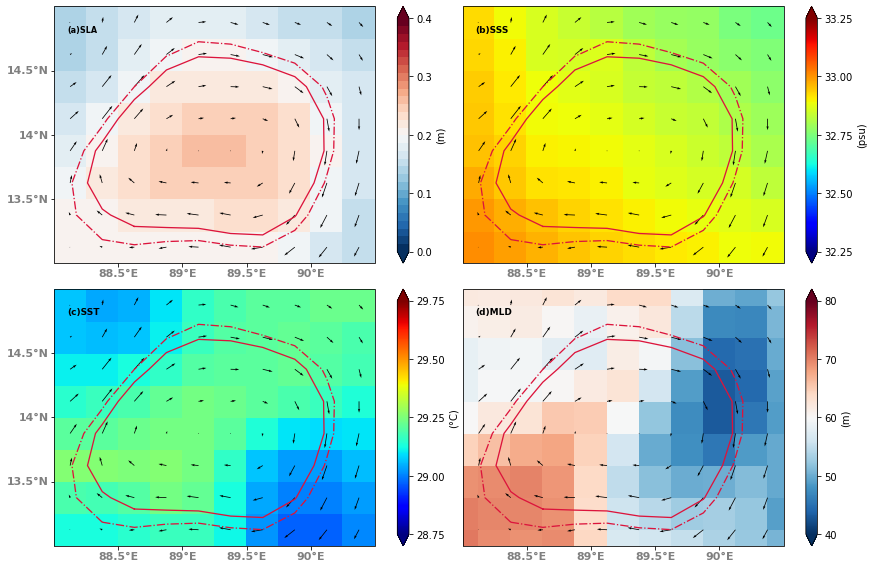

In [ ]:
fig = plt.figure(figsize=(15, 8))


############################### Anticyclonic ######################################

############################### First Plot -- SLA ##################################

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax.set_extent([88, 90.5, 13, 15], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
#ax.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([88.5, 89, 89.5, 90])
ax.set_yticks([13.5, 14, 14.5])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl.ylocator = mticker.FixedLocator(np.arange(13,15,0.5))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

m = g.display(ax, "sla", vmin=0.0, vmax=0.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 8, 17)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
#c.display(ax, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=8, color="k")

#ax.legend(loc='upper right', fontsize = 6)

ax.annotate('(a)SLA', xy=(88.1, 14.8), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m, extend='both', ticks=np.linspace(0.0, 0.4, num=5), label='(m)')


############################### Second plot -- SSS #####################################

ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax2.set_extent([88, 90.5, 13, 15], ccrs.PlateCarree()) 


ax2.add_feature(cfeature.LAND, color = 'gray')
ax2.add_feature(cfeature.COASTLINE, color = 'gray')
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax2.set_xticks([88.5, 89, 89.5, 90])
#ax.set_yticks([13.5, 14, 14.5])

#ax4.set_yticklabels([])
ax2.set_xticklabels([])

gl2 = ax2.gridlines()
gl2.bottom_labels = True
gl2.left_labels = False
gl2.xlines = False
gl2.ylines = False

gl2.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl2.ylocator = mticker.FixedLocator(np.arange(13,15,0.5))

gl2.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl2.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g2 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g22 = RegularGridDataset('drive/MyDrive/2020/Vertical/sss_aug17.nc', "lon", "lat",)

m2 = g22.display(ax2, "sos", vmin=32.25, vmax=33.25, cmap = 'jet')

date = datetime(2020, 8, 17)
a, c = g2.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax2, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
#c.display(ax4, color="navy", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)

g2.add_uv("adt")
u, v = g2.grid("u").T, g2.grid("v").T
ax2.quiver(g2.x_c, g2.y_c, u, v, scale=8, color="k")

#ax1.legend(loc='upper right', fontsize = 6)

ax2.annotate('(b)SSS', xy=(88.1, 14.8), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Spring', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m2, extend='both', ticks=np.linspace(32.25, 33.25, num=5), label='(psu)')


############################# Third Plot -- SST ############################

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax3.set_extent([88, 90.5, 13, 15], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([88.5, 89, 89.5, 90])
ax3.set_yticks([13.5, 14, 14.5])

ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = True
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl3.ylocator = mticker.FixedLocator(np.arange(13,15,0.5))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g33 = RegularGridDataset('drive/MyDrive/2020/Vertical/sst_aug17.nc', "lon", "lat",)

m3 = g33.display(ax3, "sst", vmin=28.75, vmax=29.75, cmap = 'jet')

date = datetime(2020, 8, 17)
a, c = g3.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax3, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
#c.display(ax3, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g3.add_uv("adt")
u, v = g3.grid("u").T, g3.grid("v").T
ax3.quiver(g3.x_c, g3.y_c, u, v, scale=8, color="k")

#ax3.legend(loc='upper right', fontsize = 6)

ax3.annotate('(c)SST', xy=(88.1, 14.8), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m3, extend='both', ticks=np.linspace(28.75, 29.75, num=5), label='(°C)')

######################## Fourth Plot -- MLD #######################

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
ax4.set_extent([88, 90.5, 13, 15], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([88.5, 89, 89.5, 90])
#ax.set_yticks([13.5, 14, 14.5])

#ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = False
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(88,90.5,0.5))
gl4.ylocator = mticker.FixedLocator(np.arange(13,15,0.5))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_aug17.nc', "longitude", "latitude",)

g44 = RegularGridDataset('drive/MyDrive/2020/Vertical/mld_aug17.nc', "lon", "lat",)

m4 = g44.display(ax4, "mlotst", vmin=40, vmax=80, cmap = 'RdBu_r')

date = datetime(2020, 8, 17)
a, c = g4.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax4, color="crimson", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)
#c.display(ax4, color="navy", linewidth= 1.3, label="{nb_obs} eddies", ref=-10)

g4.add_uv("adt")
u, v = g4.grid("u").T, g4.grid("v").T
ax4.quiver(g4.x_c, g4.y_c, u, v, scale=8, color="k")

#ax4.legend(loc='upper right', fontsize = 6)

ax4.annotate('(d)MLD', xy=(88.1, 14.8), fontsize = 9, fontname = 'Times New Roman', weight='bold')

#plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

plt.colorbar(m4, extend='both', ticks=np.linspace(40, 80, num=5), label='(m)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=0.8, top=None, wspace=None, hspace=None)


#plt.colorbar(m4, cax=ax4.figure.add_axes([0.66, 0.15, 0.016, 0.70]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

plt.savefig('drive/MyDrive/2020/ac_surface.png', dpi=300, bbox_inches = "tight")





In [ ]:
################################################ CE ###############################################

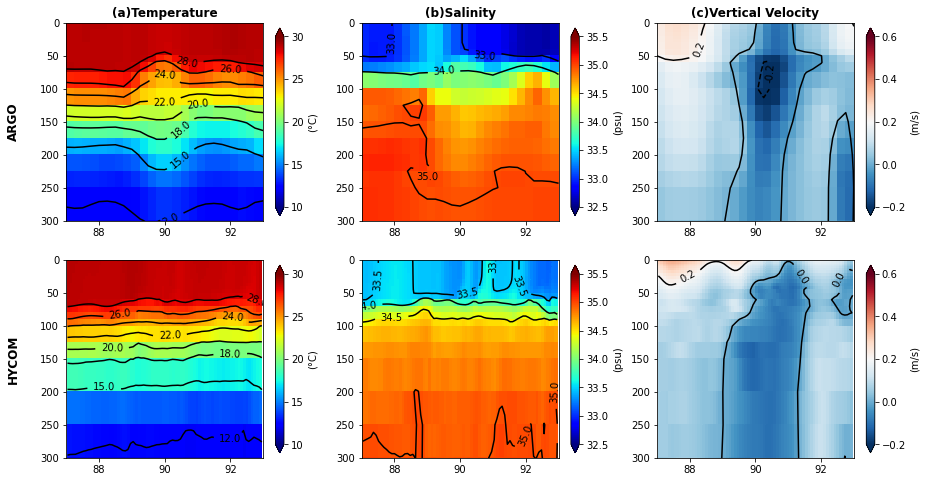

In [ ]:
fig = plt.figure(figsize=(15, 8))

################################## Vertical ######################

############################### First Plot -- Temperature -- Argo ##################################

ax1 = fig.add_subplot(231)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_temp.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax1.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(87, 93)
ax1.invert_yaxis()
ax1.set_ylabel('ARGO', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([88, 90, 92])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=10)

plt.title('(a)Temperature', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- Salinity -- Argo ###################################

ax2 = fig.add_subplot(232)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_argo.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax2.pcolormesh(ylon, z, temp, vmin=32.5, vmax= 35.5, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(87, 93)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([88, 90, 92])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")

levels = [32.5, 33, 34, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(b)Salinity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- Eastward Velocity -- Argo ####################

ax3 = fig.add_subplot(233)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_vel_argo.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["uo"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax3.pcolormesh(ylon, z, temp, vmax = 0.6, vmin = -0.2, cmap = 'RdBu_r')
ax3.set_ylim(0, 300)
ax3.set_xlim(87, 93)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([88, 90, 92])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(c)Vertical Velocity', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################  1st plot -- Temperature -- Hycom ##########################

ax4 = fig.add_subplot(234)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_hycom.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["temperature"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax4.pcolormesh(ylon, z, temp, vmin=10, vmax= 30, cmap = 'jet')
ax4.set_ylim(0, 300)
ax4.set_xlim(87, 93)
ax4.invert_yaxis()
ax4.set_ylabel('HYCOM', labelpad=20, fontsize=12, weight='bold', color='k')
#ax4.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax4.set_xticks([88, 90, 92])
ax4.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax4.set_yticklabels(y)
ax4.set_xticklabels(x)


fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


###############################  2nd plot -- Salinity -- Hycom #########################################

ax5 = fig.add_subplot(235)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_sal_hycom.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["salinity"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax5.pcolormesh(ylon, z, temp, vmin=32.5, vmax= 35.5, cmap = 'jet')
ax5.set_ylim(0, 300)
ax5.set_xlim(87, 93)
ax5.invert_yaxis()
#ax5.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax5.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax5.set_xticks([88, 90, 92])
ax5.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax5.set_yticklabels(y)
ax5.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")


levels = [32.5, 33, 33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k', levels=levels)

plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


#################################  3rd Plot -- Eastward Velocity -- Hycom #######################

ax6 = fig.add_subplot(236)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/aug17_vel_hycom.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["uo"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax6.pcolormesh(ylon, z, temp, vmax = 0.6, vmin = -0.2,  cmap = 'RdBu_r')
ax6.set_ylim(0, 300)
ax6.set_xlim(87, 93)
ax6.invert_yaxis()
#ax6.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax6.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax6.set_xticks([88, 90, 92])
ax6.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax6.set_yticklabels(y)
ax6.set_xticklabels(x)



fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k', levels = levels)
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

#plt.savefig('drive/MyDrive/2020/vertical_ac.png', dpi=300, bbox_inches = "tight")



<a list of 11 text.Text objects>

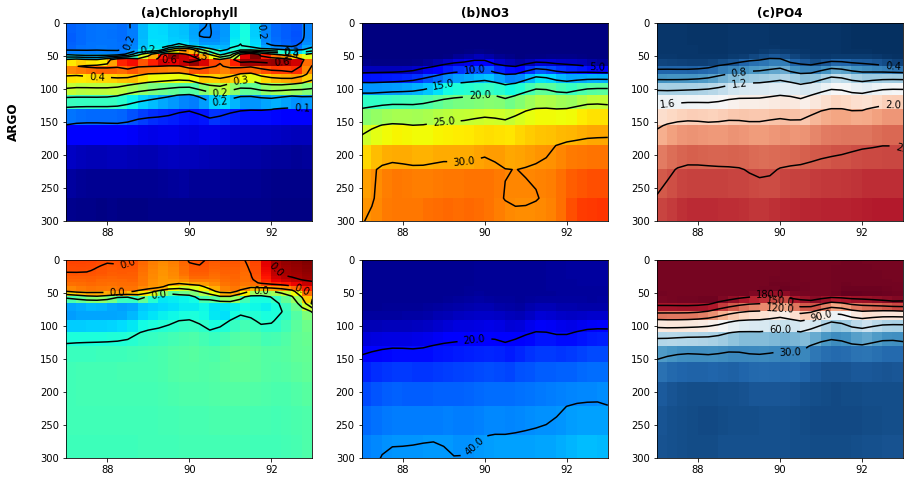

In [ ]:
fig = plt.figure(figsize=(15, 8))

################################## Vertical ######################

############################### First Plot -- Temperature -- Argo ##################################

ax1 = fig.add_subplot(231)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/Bio_aug.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["chl"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax1.pcolormesh(ylon, z, temp, cmap = 'jet')
ax1.set_ylim(0, 300)
ax1.set_xlim(87, 93)
ax1.invert_yaxis()
ax1.set_ylabel('ARGO', labelpad=20, fontsize=12, weight='bold', color='k')
#ax1.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax1.set_xticks([88, 90, 92])
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax1.set_yticklabels(y)
ax1.set_xticklabels(x)


#fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

#levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, inline=True, colors='k',fmt=r'%.1f', fontsize=10)

plt.title('(a)Chlorophyll', fontsize=12, fontname = 'Times New Roman', weight='bold')


################################### Second Plot -- Salinity -- Argo ###################################

ax2 = fig.add_subplot(232)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/Bio_aug.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["no3"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax2.pcolormesh(ylon, z, temp, cmap = 'jet')
ax2.set_ylim(0, 300)
ax2.set_xlim(87, 93)
ax2.invert_yaxis()
#ax2.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax2.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax2.set_xticks([88, 90, 92])
ax2.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax2.set_yticklabels(y)
ax2.set_xticklabels(x)


#fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")

#levels = [32.5, 33, 34, 35]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(b)NO3', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################################   3rd Plot -- Eastward Velocity -- Argo ####################

ax3 = fig.add_subplot(233)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/Bio_aug.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["po4"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax3.pcolormesh(ylon, z, temp, cmap = 'RdBu_r')
ax3.set_ylim(0, 300)
ax3.set_xlim(87, 93)
ax3.invert_yaxis()
#ax3.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax3.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax3.set_xticks([88, 90, 92])
ax3.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax3.set_yticklabels(y)
ax3.set_xticklabels(x)



#fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

#levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

plt.title('(c)PO4', fontsize=12, fontname = 'Times New Roman', weight='bold')

################################  1st plot -- Temperature -- Hycom ##########################

ax4 = fig.add_subplot(234)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/Bio_aug.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["fe"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax4.pcolormesh(ylon, z, temp, cmap = 'jet')
ax4.set_ylim(0, 300)
ax4.set_xlim(87, 93)
ax4.invert_yaxis()
#ax4.set_ylabel('HYCOM', labelpad=20, fontsize=12, weight='bold', color='k')
#ax4.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax4.set_xticks([88, 90, 92])
ax4.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax4.set_yticklabels(y)
ax4.set_xticklabels(x)


#fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(10, 30, num=5), label="(°C)")

#levels = [12, 15, 18, 20, 22, 24, 26, 28, 30]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


###############################  2nd plot -- Salinity -- Hycom #########################################

ax5 = fig.add_subplot(235)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/Bio_aug.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["si"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax5.pcolormesh(ylon, z, temp, cmap = 'jet')
ax5.set_ylim(0, 300)
ax5.set_xlim(87, 93)
ax5.invert_yaxis()
#ax5.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax5.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax5.set_xticks([88, 90, 92])
ax5.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax5.set_yticklabels(y)
ax5.set_xticklabels(x)



#fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(32.5, 35.5, num=7), label="(psu)")


#levels = [32.5, 33, 33.5, 34, 34.5, 35]
contour = plt.contour(ylon, z, temp, colors='k')

plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)


#################################  3rd Plot -- Eastward Velocity -- Hycom #######################

ax6 = fig.add_subplot(236)

data = xr.open_mfdataset('drive/MyDrive/2020/Vertical/Bio_aug.nc')

dt = data.loc[{'latitude': slice(13, 15),'longitude': slice(87, 93)}]

ylat = dt["latitude"].values

ylon = dt["longitude"].values

z = dt["depth"].values

def fun(latitude):
    
    temp = dt["o2"].values[:,[float(i) for i in dt['latitude'].values].index(latitude),:]
    return temp

temp = fun(14)


cs = ax6.pcolormesh(ylon, z, temp,  cmap = 'RdBu_r')
ax6.set_ylim(0, 300)
ax6.set_xlim(87, 93)
ax6.invert_yaxis()
#ax6.set_ylabel('Depth (m)', labelpad=20, fontsize=12, weight='bold', color='k')
#ax6.set_xlabel('Longitude (degrees)', labelpad=20, fontsize=12, weight='bold', color='k')

x = [88, 90, 92]
y = [0, 50, 100, 150, 200, 250, 300]

ax6.set_xticks([88, 90, 92])
ax6.set_yticks([0, 50, 100, 150, 200, 250, 300])

ax6.set_yticklabels(y)
ax6.set_xticklabels(x)



#fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both', ticks=np.linspace(-0.2, 0.6, num=5), label="(m/s)")

#levels = [-0.2, 0.0, 0.2, 0.4, 0.6]
contour = plt.contour(ylon, z, temp, colors='k')
plt.clabel(contour, contour.levels, inline=True, colors='k', fmt=r'%.1f', fontsize=10)

#plt.savefig('drive/MyDrive/2020/vertical_ac.png', dpi=300, bbox_inches = "tight")

